In [143]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

X,y=make_blobs(n_samples=150,
              n_features=2,
              centers=3,
              cluster_std=0.5,
              shuffle=True,
              random_state=0)

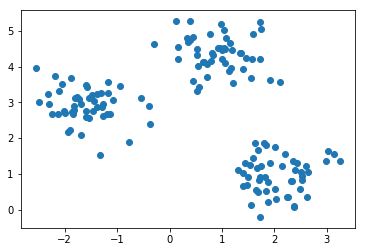

In [63]:
xx=[]
yy=[]
for i in X:
    xx.append(i[0])
    yy.append(i[1])

plt.scatter(xx,yy)

plt.show()

In [162]:
#欧式距离计算
def distance(data1,data2):
        return np.sqrt(np.sum(np.power(data1-data2 , 2)))

#随机生成k个随机质心
def randCent(dataset,k):
    m,n=dataset.shape
    centroids=np.zeros((k,n))
    for i in range(k):
        index=int(np.random.uniform(0,m))
        centroids[i,:]=dataset[index,:]
    return centroids

#K_Means聚类
def KMeans(dataset,k):
    m=dataset.shape[0]
    cluster=np.zeros(m)   #记录每个样本所属的簇
    
    clusterchange=True   #判断簇心变化，用来结束循环
    centroids=randCent(dataset,k)
    
    while clusterchange:
        clusterchange=False
        
        #遍历所有样本
        for i in range(m):
            minDist=100000
            minIndex=-1
            
            #遍历所有质心
            for j in range(k):
                dist=distance(centroids[j,:],dataset[i,:])
                if dist<minDist:
                    minDist=dist
                    minIndex=j
            #更新每个样本所属的簇
            if cluster[i] != minIndex:
                clusterchange=True
                cluster[i]=minIndex
        #更新质心
        for j in range(k):
            points=dataset[cluster==j]
            centroids[j,:]=np.mean(points,axis=0)
        
    return centroids,cluster

In [175]:
a,b=KMeans(X,3)
b==y

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

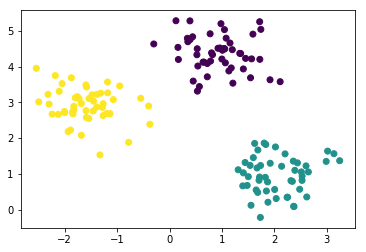

In [176]:
plt.scatter(xx,yy,c=b)
plt.show()